# Chapter 4 - Preprocessing and Pipelines

> Learn how to impute missing values, convert categorical data to numeric values, scale data, evaluate multiple supervised learning models simultaneously, and build pipelines to streamline your workflow!

In [2]:
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


## Preprocessing data

scikit-learn requirements:
- Numeric data
- No missing values
- With real-world data:
    - This is rarely the case
    - We will often need to preprocess our data first


### Example of Dealing with categorical features

- scikit-learn will not accept categorical features by default
- Need to convert categorical features into numeric values
- Convert to binary features called dummy variables:
    - 0: Observation was NOT that category
    - 1: Observation was that category

![](./images/dummies.png)

We can reduce the **Rock** column, as if all other columns are zeros, then it should be **Rock** genre.

### Dealing with categorical features in Python
- scikit-learn:``` OneHotEncoder()```
- pandas: ```get_dummies()```


### Music dataset
- popularity : Target variable
- genre : Categorical feature


In [3]:
music_clean_df = pd.read_csv('./datasets/music_clean.csv',index_col=[0])
display(music_clean_df.head())
cols = music_clean_df.columns.to_list()
print(cols)
print(music_clean_df.info())

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'genre']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 36506 to 18960
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 101.6 KB
None


In [4]:
music_df_full = pd.read_csv('./datasets/music_genre.csv',index_col=0)
music_df_full.rename(columns={'music_genre': 'genre'}, inplace=True)
music_df_full = music_df_full.loc[music_df_full['tempo'] != '?']

music_df = music_df_full[cols].sample(1000)
music_df['tempo'] = music_df['tempo'].astype(float)

music_df.reset_index(drop=True, inplace=True)

print(music_df.info())
display(music_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB
None


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,51.0,0.0468,0.499,321573.0,0.934,0.000003,0.703,-3.661,0.0966,110.046,0.357,Rock
1,64.0,0.0105,0.886,135622.0,0.676,0.000241,0.108,-6.177,0.0968,92.505,0.280,Rap
2,25.0,0.0414,0.399,-1.0,0.817,0.000000,0.264,-2.928,0.0458,184.018,0.659,Anime
3,52.0,0.0887,0.795,249271.0,0.633,0.000023,0.101,-7.926,0.0907,110.025,0.292,Hip-Hop
4,22.0,0.0732,0.572,463240.0,0.346,0.007280,0.148,-10.134,0.0399,134.657,0.201,Blues


In [5]:
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)
print(music_dummies.head())

   Anime  Blues  Classical  Country  Electronic  Hip-Hop  Jazz  Rap  Rock
0      0      0          0        0           0        0     0    0     1
1      0      0          0        0           0        0     0    1     0
2      1      0          0        0           0        0     0    0     0
3      0      0          0        0           0        1     0    0     0
4      0      1          0        0           0        0     0    0     0


In [6]:
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop("genre", axis=1)

In [7]:
# Encoding dummy variables
music_dummies = pd.get_dummies(music_df, drop_first=True)
print(music_dummies.columns)

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre_Anime', 'genre_Blues', 'genre_Classical',
       'genre_Country', 'genre_Electronic', 'genre_Hip-Hop', 'genre_Jazz',
       'genre_Rap', 'genre_Rock'],
      dtype='object')


In [8]:
# Linear regression with dummy variables
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression


X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf,
scoring="neg_mean_squared_error")
print(np.sqrt(-linreg_cv))

[ 9.54345254 10.32756613 10.37540973 10.27973571 10.14184684]


### Creating dummy variables (Exercise)

Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The `music_df` dataset has been preloaded for you, and its shape is printed. Also, `pandas` has been imported as `pd`.

Now you will create a new `DataFrame` containing the original columns of `music_df` plus dummy variables from the "`genre`" column.

Instructions:
- Use a relevant function, passing the entire `music_df` DataFrame, to create `music_dummies`, dropping the first binary column.
- Print the shape of `music_dummies`.

In [9]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 20)


As there were ten values in the "genre" column, nine new columns were added by a call of `pd.get_dummies()` using `drop_first=True`. 

After dropping the original "`genre`" column, there are still eight new columns in the DataFrame!

### Regression with categorical features (Exercise)

Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

`music_dummies` has been preloaded for you, along with `Ridge`, `cross_val_score`, `numpy as np`, and a `KFold` object stored as `kf`.

The model will be evaluated by calculating the average **RMSE**, but first, you will need to convert the scores for each fold to positive values and take their square root. 
This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value—"popularity".

Instructions:
- Create `X`, containing all features in `music_dummies`, and `y`, consisting of the "`popularity`" column, respectively.
- Instantiate a ridge regression model, setting `alpha` equal to `0.2`.
- Perform cross-validation on `X` and `y` using the `ridge` model, setting `cv` equal to `kf`, and using negative mean squared error as the scoring metric.
- Print the `RMSE` values by converting negative scores to positive and taking the square

In [10]:
from sklearn.linear_model import Ridge
# Create X and y
X = music_dummies.drop(['popularity'], axis =1).values
y = music_dummies['popularity'].values

# Instantiate a ridge model
ridge = Ridge( alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 10.03832835646816
Standard Deviation of the target array: 15.578642302845266


Great work! An average RMSE of approximately **9.4** is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.


## Handling missing data

- Missing data
- No value for a feature in a particular row
- This can occur because:
    - There may have been no observation
    - The data might be corrupt
- We need to deal with missing data

![](./images/missing_1.png)

![](./images/missing_2.png)

![](./images/missing_3.png)

![](./images/missing_4.png)

![](./images/missing_5.png)

![](./images/missing_6.png)

![](./images/missing_7.png)


### Dropping missing data

Over the next three exercises, you are going to tidy the `music_df` dataset. You will create a pipeline to impute missing values and build a **KNN classifier model**, then use it to predict whether a song is of the "**Rock**" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

Instructions:
- Print the number of missing values for each column in the `music_df` dataset, sorted in ascending order.

In [11]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


- Remove values for all columns with 50 or fewer missing values.

In [12]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())
lessthan50NanCols = [i for i in music_df.columns if music_df[i].isna().sum() <= 50]

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset = lessthan50NanCols)

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


- Convert `music_df["genre"]` to values of 1 if the row contains "Rock", otherwise change the value to 0.

In [13]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 12)


### Pipeline for song genre prediction: I

Now it's time to build a **pipeline**. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified `music_df` dataset that you created in the previous exercise has been preloaded for you, along with `KNeighborsClassifier` and `train_test_split`.

Instructions:
- Import `SimpleImputer` and `Pipeline`.
- Instantiate an `imputer`.
- Instantiate a KNN classifier with three neighbors.
- Create steps, a list of tuples containing the imputer variable you created, called "`imputer`", followed by the `knn` model you created,

In [14]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Instantiate an imputer
imputer = SimpleImputer(strategy="most_frequent")

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]


### Pipeline for song genre prediction: II
Having set up the steps of the pipeline in the previous exercise, you will now use it on the `music_df` dataset to classify the genre of songs. 
What makes pipelines so incredibly useful is the simple interface that they provide.

`X_train`, `X_test`, `y_train`, and `y_test` have been preloaded for you, and `confusion_matrix` has been imported from `sklearn.metrics`.

Instructions:
- Create a pipeline using the steps you previously defined.
- Fit the pipeline to the training data.
- Make predictions on the test set.
- Calculate and print the confusion matrix.

In [15]:
imp_mean = SimpleImputer(strategy="mean")

In [16]:
steps = [("imputer", imp_mean),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Centering and scaling

![](./images/scale1.png)


### Why scale our data?

- Many models use some form of distance to inform them
- Features on larger scales can disproportionately influence the model
- Example: KNN uses distance explicitly when making predictions
- We want features to be on a similar scale
- Normalizing or standardizing (scaling and centering)

### How to scale our data

- Subtract the mean and divide by variance
    - All features are centered around zero and have a variance of one
    - This is called **standardization**
- Can also subtract the minimum and divide by the range
    - Minimum zero and maximum one
- Can also normarmalize so the data ranges from -1 to +1
- See scikit-learn docs for further details



### Scaling in scikit-learn

```python 
from sklearn.preprocessing import StandardScaler

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

```

### Scaling in a pipeline

``` python 

steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))
```

### Comparing performance using unscaled data

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))
```

### CV and scaling in a pipeline
```python
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
```

### Centering and scaling for regression (Exercise)

Now you have seen the benefits of scaling your data, you will use a pipeline to pre-process the `music_df` features and build a lasso regression model to predict a song's loudness.

`X_train`, `X_test`, `y_train`, and `y_test` have been created from the `music_df` dataset, where the target is "`loudness`" and the features are all other columns in the dataset. Lasso and Pipeline have also been imported for you.

Note that "`genre`" has been converted to a binary feature where 1 indicates a rock song, and 0 represents other genres.

Instructions:
- Import `StandardScaler`.
- Create the steps for the pipeline object, a `StandardScaler` object called "`scaler`", and a lasso model called "`lasso`" with alpha set to 0.5.
- Instantiate a pipeline with steps to scale and build a lasso regression model.
- Calculate the R-squared value on the test data.

In [20]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

-0.006181318681318659



### Centering and scaling for  classification (Exercise)

Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the `music_df` dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter C. The target variable here is "genre", which contains binary values for rock as 1 and any other genre as 0.

`StandardScaler`, `LogisticRegression`, and `GridSearchCV` have all been imported for you.

Instructions:
- Build the steps for the pipeline: a `StandardScaler()` object named "`scaler`", and a logistic regression model named "`logreg`".
- Create the parameters, searching 20 equally spaced float values ranging from `0.001` to `1.0` for the logistic regression model's C hyperparameter within the pipeline.
- Instantiate the grid search object.
- Fit the grid search object to the training data.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Build the steps for the pipeline: a `StandardScaler()` object named "`scaler`", and a logistic regression model named "`logreg`".

steps = [   
               ("scaler", StandardScaler()),
               ("logreg", LogisticRegression())
            ]
pipeline = Pipeline(steps)

# Create the `parameters`, searching 20 equally spaced float values ranging from 0.001 to 1.0 for the logistic regression model's C hyperparameter within the pipeline

parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.90625 
 {'logreg__C': 0.36905263157894735}


## Evaluating multiple models

Different models for different problems

### Some guiding principles

- Size of the dataset
    - Fewer features = simpler model, faster training time
    - Some models require large amounts of data to perform well

- Interpretability
    - Some models are easier to explain, which can be important for stakeholders
    - Linear regression has high interpretability, as we can understand the coefficients

- Flexibility
    - May improve accuracy, by making fewer assumptions about data
    - KNN is a more flexible model, doesn't assume any linear relationships


### It's all in the metrics

- Regression model performance:
    - RMSE
    - R-squared

- Classification model performance:
    - Accuracy
    - Confusion matrix
    - Precision, recall, F1-score
    - ROC AUC

- Train several models and evaluate performance out of the box

### A note on scaling

- Models a(ected by scaling:
    - KNN
    - Linear Regression (plus Ridge, Lasso)
    - Logistic Regression
    - Artificial Neural Network
- Best to scale our data before evaluating models


### Evaluating classification models

``` python
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

```

### Evaluating classification models

``` python

models = {  
            "Logistic Regression": LogisticRegression(),
            "KNN": KNeighborsClassifier(),
            "Decision Tree": DecisionTreeClassifier()
        }

results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()
```

![](./images/viz.png)


### Visualizing regression model performance (Exercise)

Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "`energy`" levels.

The `music_df` dataset has had dummy variables for "`genre`" added. Also, feature and target arrays have been created, and these have been split into `X_train`, `X_test`, `y_train`, and `y_test`.

The following have been imported for you: `LinearRegression`, `Ridge`, `Lasso`, `cross_val_score`, and `KFold`.

Instructions:
- Write a for loop using `model` as the iterator, and `model.values()` as the iterable.
- Perform cross-validation on the training features and the training target array using the model, setting `cv` equal to the `KFold` object.
- Append the model's cross-validation scores to the results list.
- Create a box plot displaying the results, with the x-axis labels as the names of the models.

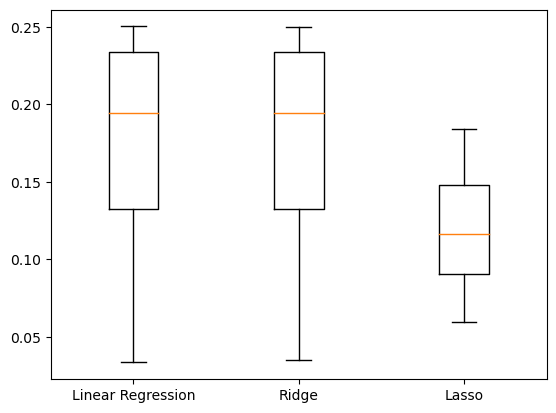

In [24]:
import matplotlib.pyplot as plt

models = {
            "Linear Regression": LinearRegression(), 
            "Ridge": Ridge(alpha=0.1), 
            "Lasso": Lasso(alpha=0.1)
            }
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

### Predicting on the test set (Exercise)

In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays `X_train_scaled`, `X_test_scaled`, `y_train`, and `y_test`.

Instructions:
- Import `mean_squared_error`.
- Fit the model to the scaled training features and the training labels.
- Make predictions using the scaled test features.
- Calculate RMSE by passing the test set labels and the predicted labels.

In [28]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {  
            "Logistic Regression": LogisticRegression(),
            "KNN": KNeighborsClassifier(),
            "Decision Tree": DecisionTreeClassifier()
        }

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Logistic Regression Test Set RMSE: 0.322490309931942
KNN Test Set RMSE: 0.3286335345030997
Decision Tree Test Set RMSE: 0.37416573867739417


### Visualizing classification model performance (Exercise)

In this exercise, you will be solving a classification problem where the "`popularity`" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "`popularity`" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as `X_train_scaled`, `X_test_scaled`, `y_train`, and `y_test`. Additionally, `KNeighborsClassifier`, `DecisionTreeClassifier`, and `LogisticRegression` have been imported.

Instructions:
- Create a dictionary of "Logistic Regression", "KNN", and "Decision Tree Classifier", setting the dictionary's values to a call of each model.
- Loop through the values in models.
- Instantiate a `KFold` object to perform 6 splits, setting `shuffle` to `True` and `random_state` to 12.
- Perform cross-validation using the model, the scaled training features, the target training set, and setting `cv` equal to `kf`.

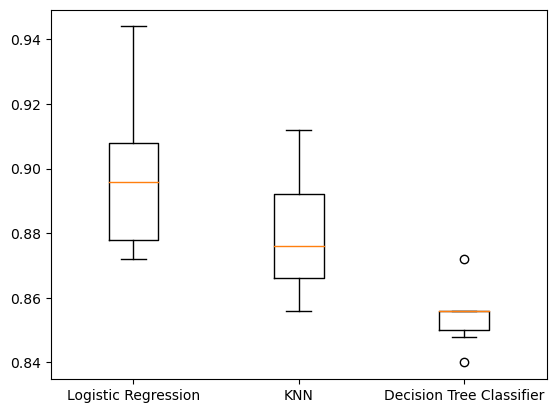

In [29]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()


### Pipeline for predicting song popularity (Exercise)
For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. 
The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.

Instructions:
- Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.
- Create a pipeline object, and pass the steps variable.
- Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.
- Print the best parameters and compute and print the test set accuracy score for the grid search object.

In [30]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.912


## What you've covered

- Using supervised learning techniques to build predictive models
- For both regression and classi,cation problems
- Underfitting and overfittng
- How to split data
- Cross-validation
- Data preprocessing techniques
- Model selection
- Hyperparameter tuning
- Model performance evaluation
- Using pipelines